# Load Modules

In [18]:
import json
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from utils import process_msms, bin_msms, generate_fingerprint

# Load Data

In [3]:
f = open('data/MoNA-export-LC-MS-MS_Spectra.json')

data = json.load(f)

f.close()
print("Total number of spectra: ", len(data))

Total number of spectra:  145379


# Process Data

In [5]:
all_msms = []
all_fps = []
failed_fps = []

for i, x in enumerate(data):

    if i%2500 == 0:
        print(i)

    msms = x['spectrum']
    mz_array, intensity_array = process_msms(msms)

    # skip msms with mz > 1000
    if max(mz_array) > 1000: 
        continue

    msms_vec = bin_msms(mz_array, intensity_array)

    try:
        for mD in x['compound'][0]['metaData']:
            if mD['name'] == 'SMILES':
                smiles = mD['value']
                break
        fp = generate_fingerprint(smiles)
    except:
        failed_fps.append(i)
        continue

    all_msms.append(msms_vec)
    all_fps.append(fp)

print("Number of msms and fps processed: ", len(all_fps))
print("Number of failed instances: ", len(failed_fps))

0
2500
5000
7500
10000
12500
15000
17500
20000
22500
25000


[09:40:53] SMILES Parse Error: unclosed ring for input: 'OC1=CC(C(OC)=O)=C(OC2=CC(C)=CC(O)=C2C(O)=O)C(OC)=C2'
[09:40:53] SMILES Parse Error: unclosed ring for input: 'O=C1C2=C(C=C(C)C=C2O)OC3=CC(O)=CC(C(OC)=O)=C32'
[09:40:54] SMILES Parse Error: unclosed ring for input: 'O=C([C@H](CC)C)O[C@H]1CCC=C2C1[C@@H](CC[C@@H](O)C[C@@H](O)CC(OC)=O)[C@@H](C)C=C3'
[09:40:54] SMILES Parse Error: unclosed ring for input: 'O=C(N[C@@H](CCCCCC(CC)=O)C(N[C@@H](CC1=CN(OC)C2=C1C=CC=C2)C3=O)=O)[C@@H]4N(C([C@H]([C@H](CC)C)N3)=O)CCCC5'
[09:40:54] SMILES Parse Error: unclosed ring for input: 'O=C(N(C(C=CC=C1)=C1C(N(C)[C@@]2([H])CC3=CC=CC=C3)=O)C2=N4)C5=C4C=CC=C6'
[09:40:54] SMILES Parse Error: unclosed ring for input: 'OC1=CC=C(CC(C(NC(C(CC)C)C(OC(C(CCCCCCCCCC)C)CC(NC(C(NC(C(NC(C(NC2CCC(N)=O)=O)C)=O)C)=O)C(O)C)=O)=O)=O)NC2=O)C=C2'


27500


[09:41:00] SMILES Parse Error: syntax error while parsing: InChI=1S/C15H10O3/c16-11-6-7-12-13(17)9-14(18-15(12)8-11)10-4-2-1-3-5-10/h1-9,16H
[09:41:00] SMILES Parse Error: Failed parsing SMILES 'InChI=1S/C15H10O3/c16-11-6-7-12-13(17)9-14(18-15(12)8-11)10-4-2-1-3-5-10/h1-9,16H' for input: 'InChI=1S/C15H10O3/c16-11-6-7-12-13(17)9-14(18-15(12)8-11)10-4-2-1-3-5-10/h1-9,16H'
[09:41:00] SMILES Parse Error: syntax error while parsing: InChI=1S/C16H12O5/c1-20-11-4-2-9(3-5-11)12-8-21-14-7-10(17)6-13(18)15(14)16(12)19/h2-8,17-18H,1H3
[09:41:00] SMILES Parse Error: Failed parsing SMILES 'InChI=1S/C16H12O5/c1-20-11-4-2-9(3-5-11)12-8-21-14-7-10(17)6-13(18)15(14)16(12)19/h2-8,17-18H,1H3' for input: 'InChI=1S/C16H12O5/c1-20-11-4-2-9(3-5-11)12-8-21-14-7-10(17)6-13(18)15(14)16(12)19/h2-8,17-18H,1H3'
[09:41:00] SMILES Parse Error: syntax error while parsing: InChI=1S/C16H12O5/c1-20-11-4-2-9(3-5-11)12-8-21-14-7-10(17)6-13(18)15(14)16(12)19/h2-8,17-18H,1H3
[09:41:00] SMILES Parse Error: Failed parsing SMI

30000
32500
35000


[09:41:16] Explicit valence for atom # 19 N, 5, is greater than permitted
[09:41:21] SMILES Parse Error: syntax error while parsing: n/a
[09:41:21] SMILES Parse Error: Failed parsing SMILES 'n/a' for input: 'n/a'
[09:41:22] SMILES Parse Error: syntax error while parsing: n/a
[09:41:22] SMILES Parse Error: Failed parsing SMILES 'n/a' for input: 'n/a'
[09:41:22] Explicit valence for atom # 22 O, 3, is greater than permitted


37500


[09:41:22] Explicit valence for atom # 35 O, 3, is greater than permitted
[09:41:23] SMILES Parse Error: syntax error while parsing: n/a
[09:41:23] SMILES Parse Error: Failed parsing SMILES 'n/a' for input: 'n/a'
[09:41:23] SMILES Parse Error: syntax error while parsing: n/a
[09:41:23] SMILES Parse Error: Failed parsing SMILES 'n/a' for input: 'n/a'
[09:41:24] Explicit valence for atom # 4 O, 3, is greater than permitted
[09:41:24] Explicit valence for atom # 7 O, 3, is greater than permitted
[09:41:24] SMILES Parse Error: syntax error while parsing: n/a
[09:41:24] SMILES Parse Error: Failed parsing SMILES 'n/a' for input: 'n/a'
[09:41:24] SMILES Parse Error: syntax error while parsing: n/a
[09:41:24] SMILES Parse Error: Failed parsing SMILES 'n/a' for input: 'n/a'
[09:41:25] SMILES Parse Error: syntax error while parsing: n/a
[09:41:25] SMILES Parse Error: Failed parsing SMILES 'n/a' for input: 'n/a'
[09:41:25] SMILES Parse Error: syntax error while parsing: n/a
[09:41:25] SMILES Pars

40000


[09:41:27] Explicit valence for atom # 35 O, 3, is greater than permitted
[09:41:27] SMILES Parse Error: syntax error while parsing: n/a
[09:41:27] SMILES Parse Error: Failed parsing SMILES 'n/a' for input: 'n/a'
[09:41:27] SMILES Parse Error: syntax error while parsing: n/a
[09:41:27] SMILES Parse Error: Failed parsing SMILES 'n/a' for input: 'n/a'
[09:41:28] SMILES Parse Error: syntax error while parsing: n/a
[09:41:28] SMILES Parse Error: Failed parsing SMILES 'n/a' for input: 'n/a'
[09:41:28] SMILES Parse Error: syntax error while parsing: n/a
[09:41:28] SMILES Parse Error: Failed parsing SMILES 'n/a' for input: 'n/a'
[09:41:28] SMILES Parse Error: syntax error while parsing: n/a
[09:41:28] SMILES Parse Error: Failed parsing SMILES 'n/a' for input: 'n/a'
[09:41:28] SMILES Parse Error: syntax error while parsing: n/a
[09:41:28] SMILES Parse Error: Failed parsing SMILES 'n/a' for input: 'n/a'
[09:41:29] Explicit valence for atom # 35 O, 3, is greater than permitted
[09:41:29] Explici

42500
45000
47500
50000
52500
55000
57500
60000
62500
65000
67500
70000
72500
75000
77500
80000
82500
85000


[09:48:13] SMILES Parse Error: syntax error while parsing: InChI=1S/C16H21NO2/c1-2-3-4-5-6-11-14-16(19)15(18)12-9-7-8-10-13(12)17-14/h7-10,19H,2-6,11H2,1H3,(H,17,18)
[09:48:13] SMILES Parse Error: Failed parsing SMILES 'InChI=1S/C16H21NO2/c1-2-3-4-5-6-11-14-16(19)15(18)12-9-7-8-10-13(12)17-14/h7-10,19H,2-6,11H2,1H3,(H,17,18)' for input: 'InChI=1S/C16H21NO2/c1-2-3-4-5-6-11-14-16(19)15(18)12-9-7-8-10-13(12)17-14/h7-10,19H,2-6,11H2,1H3,(H,17,18)'
[09:48:13] SMILES Parse Error: syntax error while parsing: NA
[09:48:13] SMILES Parse Error: Failed parsing SMILES 'NA' for input: 'NA'


87500
90000
92500
95000
97500


[09:49:21] SMILES Parse Error: syntax error while parsing: CC1(C)[C@H](OC(C)=O)[C@H](O)C[C@]([C@@]1([H])CC[C@H]2C)(C)[C@]32CC4=C(O)C=C(CO)C(C=O)=C4O3&gt;&gt;
[09:49:21] SMILES Parse Error: Failed parsing SMILES 'CC1(C)[C@H](OC(C)=O)[C@H](O)C[C@]([C@@]1([H])CC[C@H]2C)(C)[C@]32CC4=C(O)C=C(CO)C(C=O)=C4O3&gt;&gt;' for input: 'CC1(C)[C@H](OC(C)=O)[C@H](O)C[C@]([C@@]1([H])CC[C@H]2C)(C)[C@]32CC4=C(O)C=C(CO)C(C=O)=C4O3&gt;&gt;'
[09:49:21] Explicit valence for atom # 19 N, 4, is greater than permitted


100000


[09:49:24] SMILES Parse Error: syntax error while parsing: (CC(=O)O3)O)C
[09:49:24] SMILES Parse Error: Failed parsing SMILES '(CC(=O)O3)O)C' for input: '(CC(=O)O3)O)C'
[09:49:24] Explicit valence for atom # 17 N, 4, is greater than permitted


102500
105000
107500
110000
112500
115000
117500
120000


[09:50:59] SMILES Parse Error: syntax error while parsing: CC1(C)[C@H](OC(C)=O)CC[C@]([C@@]1([H])CC[C@H]2C)(C)[C@]32CC4=C(O)C=C(CO)C(C=O)=C4O3&gt;&gt;
[09:50:59] SMILES Parse Error: Failed parsing SMILES 'CC1(C)[C@H](OC(C)=O)CC[C@]([C@@]1([H])CC[C@H]2C)(C)[C@]32CC4=C(O)C=C(CO)C(C=O)=C4O3&gt;&gt;' for input: 'CC1(C)[C@H](OC(C)=O)CC[C@]([C@@]1([H])CC[C@H]2C)(C)[C@]32CC4=C(O)C=C(CO)C(C=O)=C4O3&gt;&gt;'
[09:51:00] SMILES Parse Error: syntax error while parsing: CC1(C)[C@H](OC(C)=O)[C@H](O)C[C@]([C@@]1([H])CC[C@H]2C)(C)[C@]32CC4=C(O)C=C(CO)C(C=O)=C4O3&gt;&gt;
[09:51:00] SMILES Parse Error: Failed parsing SMILES 'CC1(C)[C@H](OC(C)=O)[C@H](O)C[C@]([C@@]1([H])CC[C@H]2C)(C)[C@]32CC4=C(O)C=C(CO)C(C=O)=C4O3&gt;&gt;' for input: 'CC1(C)[C@H](OC(C)=O)[C@H](O)C[C@]([C@@]1([H])CC[C@H]2C)(C)[C@]32CC4=C(O)C=C(CO)C(C=O)=C4O3&gt;&gt;'


122500


[09:51:08] SMILES Parse Error: syntax error while parsing: CC1(C)[C@H](O)CC[C@]([C@@]1([H])CC[C@H]2C)(C)[C@]32CC4=C(O)C=C(C=O)C(C=O)=C4O3&gt;&gt;
[09:51:08] SMILES Parse Error: Failed parsing SMILES 'CC1(C)[C@H](O)CC[C@]([C@@]1([H])CC[C@H]2C)(C)[C@]32CC4=C(O)C=C(C=O)C(C=O)=C4O3&gt;&gt;' for input: 'CC1(C)[C@H](O)CC[C@]([C@@]1([H])CC[C@H]2C)(C)[C@]32CC4=C(O)C=C(C=O)C(C=O)=C4O3&gt;&gt;'


125000
127500
130000
132500
135000


[09:51:54] Explicit valence for atom # 11 N, 4, is greater than permitted
[09:51:54] Explicit valence for atom # 6 N, 4, is greater than permitted
[09:51:54] Explicit valence for atom # 8 N, 4, is greater than permitted


137500
140000
142500
145000
Number of msms and fps processed:  134586
Number of failed instances:  50


In [9]:
with open("data/msms.pkl", 'wb') as f:
    pickle.dump(all_msms, f)
with open("data/fps_maccs.pkl", 'wb') as f:
    pickle.dump(all_fps, f)

# Evaluate distribution

In [12]:
all_fps = np.array(all_fps)

(0.0, 167.0)

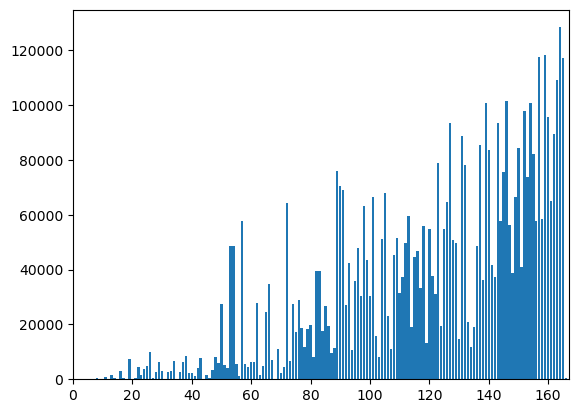

In [22]:
plt.bar(np.arange(len(all_fps[0])), np.sum(all_fps, 0))
plt.xlim([0, 167])